# Interactive PreliZ examples

The examples below can be executed from within this page thanks to embedded integration with Binder via Thebe.
Click on the button below and start playing with PreliZ right from your browser or open this notebook or Binder directly [![badge](https://img.shields.io/badge/launch-binder-579ACA.svg?logo=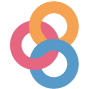)](https://mybinder.org/v2/gh/arviz-devs/arviz_sandbox/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Farviz-devs%252Fpreliz%26urlpath%3Dtree%252Fpreliz%252Fdocs%252Fexamples%252Finteractive_examples.ipynb%26branch%3Dmain)


:::{thebe-button}
:::

In [1]:
# latest PreliZ might not be installed
import sys

!{sys.executable} -m pip install preliz@git+https://github.com/arviz-devs/preliz.git

In [1]:
import arviz as az
import preliz as pz

In [2]:
az.style.use("arviz-white")

(distributions_interactive)=

## Distributions

PreliZ is an open source project aiming to provide tools to help you define priors for your models. 

When setting priors for a Bayesian model, sometimes all we need is to quickly inspect the shape of a distribution. We usually what to identify were the bulk of the mass is, or how ticks the tails are. Even if we are familiar with a given probability distributions, getting the right parameters may require to change them a few times, until we get something close to what we have in mind.

With PreliZ we can easily plot the [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) (pdf) of a given distribution.

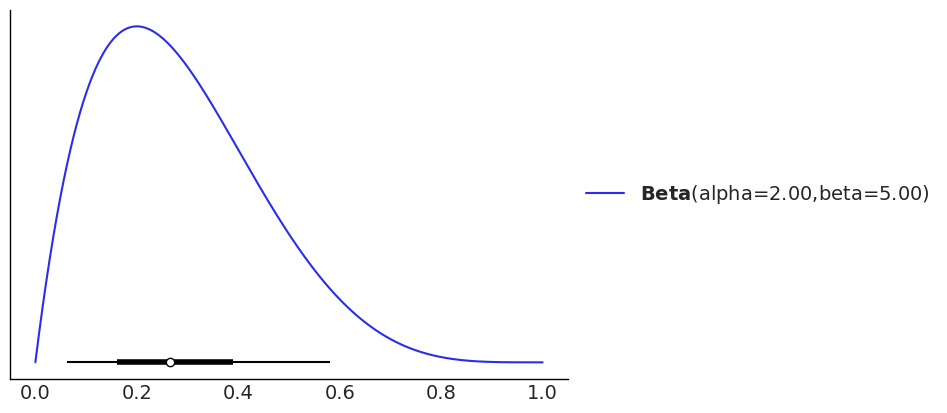

In [3]:
pz.Beta(2, 5).plot_pdf(pointinterval=True);

We got the PDF in blue, and because we passed the argument `pointinterval=True` we also got a box-plot-like element at the bottom, that may help us interpret what a `Beta(2, 5)` actually means. The white dot represents the median, the thicker line the interquartile range, i.e the interval defined by the quantiles 0.25 and 0.75 (or in other words the central 50% of the distribution) and the thinner line the interval defined by the 0.05 and 0.95 quantiles.

For simplicity we also use `plot_pdf` for discrete distributions

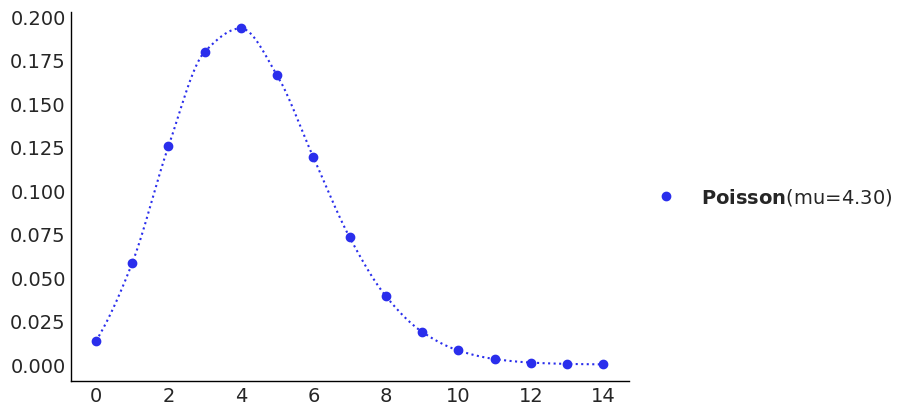

In [4]:
pz.Poisson(4.3).plot_pdf();

We can include more than one distribution in the same plot. This can be useful to compare the impact of parameters on a given distribution or maybe different distributions.

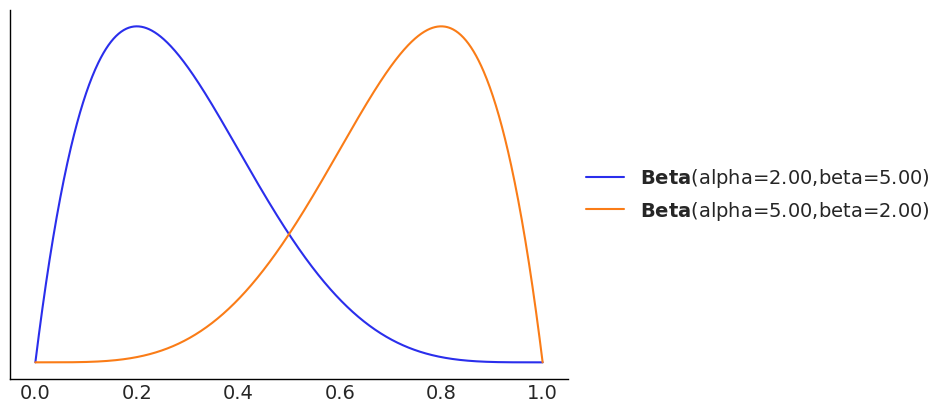

In [5]:
pz.Beta(2, 5).plot_pdf()
pz.Beta(5, 2).plot_pdf();

We can also easily plot the [cumulative distribution function](https://en.wikipedia.org/wiki/cumulative_distribution_function) (cdf).

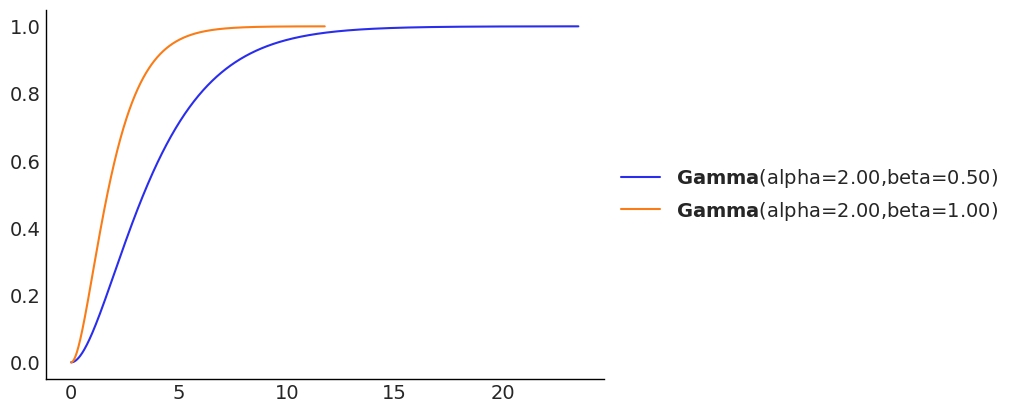

In [6]:
pz.Gamma(2, 0.5).plot_cdf()
pz.Gamma(2, 1).plot_cdf();

or the [quantile function](https://en.wikipedia.org/wiki/Quantile_function), also known as the percentile function or the inverse of the cdf.

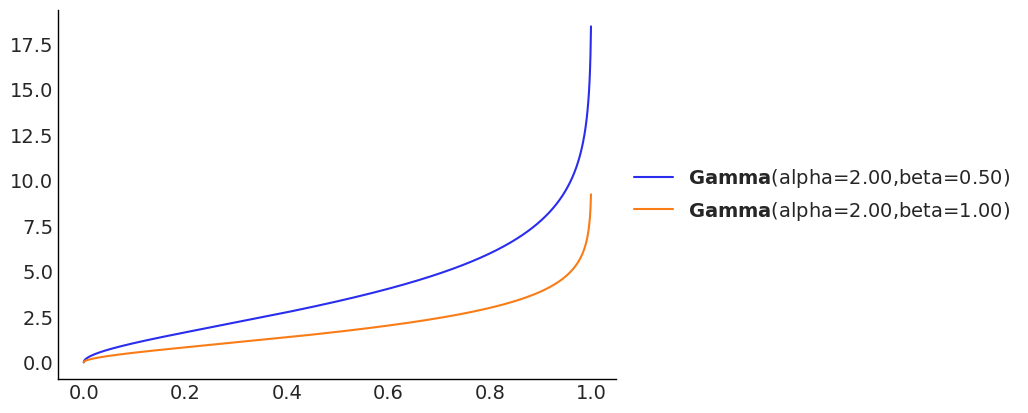

In [7]:
pz.Gamma(2, 0.5).plot_ppf()
pz.Gamma(2, 1).plot_ppf();

PreliZ also allows to interact with distributions using sliders. Currently we need to define some initial values and PreliZ will provide with sliders around those values. In the future, PreliZ will provide some default initialization. Which can be handy if we are not very familiar with the parameters a distribution takes.

In [8]:
pz.Gamma(mu=2, sigma=1).plot_interactive()

interactive(children=(FloatSlider(value=2.0, description='mu (0, inf)', max=12.0, min=2.220446049250313e-16, s…

### Alternative parametrization

Some of the distributions in PreliZ can be defined in more that one way. For example, in the previous example we define Gamma in terms of `mu` and `alpha`, but we can also define this distribution in terms of `alpha` and `beta`.


### Properties of distributions

Once we have set the parameters of a distributions we can ask for properties of it. We can get a few summary statistics with the `summary` method.

In [9]:
dist = pz.Beta(2, 5)
dist.summary()

Beta(mean=0.29, median=0.26, std=0.16, lower=0.05, upper=0.63)

Additionally we can compute two different type of intervals out-of-the-box, the equal-tailed interval and the highest density interval. Following ArviZ, the default mass for both intervals is 0.94.

In [10]:
dist.eti(), dist.hdi()

((0.05, 0.63), (0.02, 0.57))

And we can get random samples

In [11]:
dist.rvs(10)

array([0.10644984, 0.16919142, 0.23553092, 0.16693247, 0.14376355,
       0.36201674, 0.17197718, 0.36738035, 0.37486684, 0.47370176])

PreliZ distributions are wrappers of SciPy distributions, so once the parameters of a distribution are defined (i.e. the distribution has been frozen) we have access to the underlying `rv_frozen` object. For example, we can compute the logpdf by doing:

In [12]:
dist.rv_frozen.logpdf(0.5)

-0.06453852113757108

(maxent_interactive)=

## From intervals to distributions

At other times, instead of defining a prior by tweaking the parameters of a given distribution, we would like to find a distribution that has certain mass inside some interval. PreliZ can do this with the `pz.maxent` function, that adds one additional constraint, it returns the maximum entropy distribution. Having priors with maximum entropy makes sense as this guarantees that we have the less informative distribution, given a set of constraints. In summary `pz.maxent` will find the distribution with maximum entropy that have a certain mass inside a given interval.

Here we compare a Beta and a Normal, with the constraints of having 0.6 of the probability mass inside the interval 0.3, 0.8.

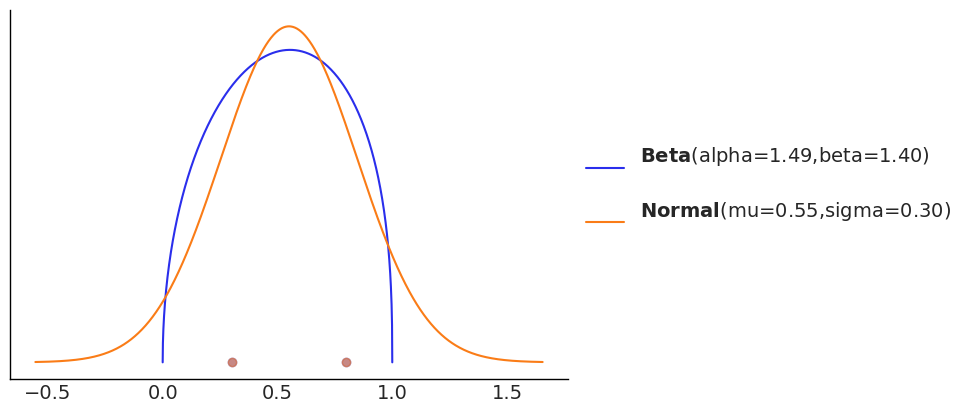

In [13]:
pz.maxent(pz.Beta(), 0.3, 0.8, 0.6)
pz.maxent(pz.Normal(), 0.3, 0.8, 0.6);

We can also keep parameters fixed by directly passing them to a distribution. For instance we may want to find a SkewNormal with mu (location) parameter -1 and with 90% of the mass between -2 and 10.

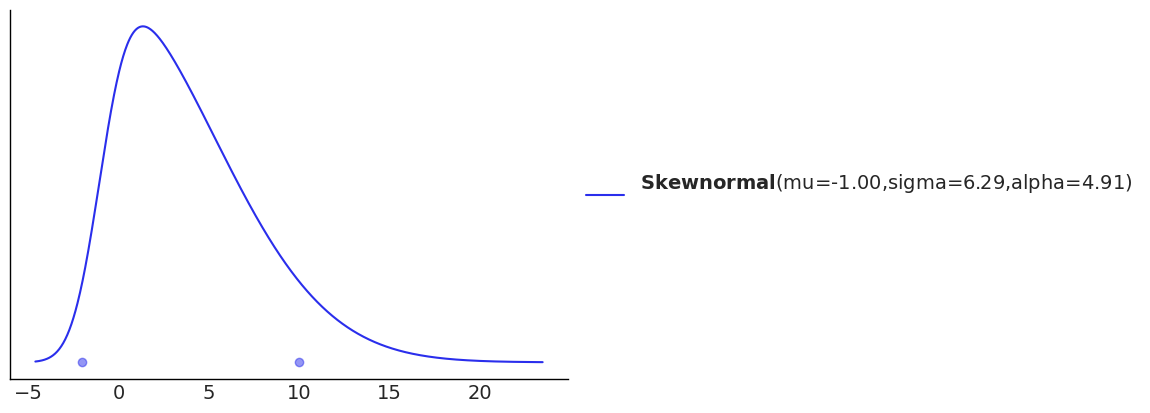

In [14]:
pz.maxent(pz.SkewNormal(mu=-1), -2, 10, 0.9);

(quartile_interactive)=

## From intervals to distributions with quartiles

Yet another alternative is to define a distribution by it [quartiles](https://en.wikipedia.org/wiki/Quartile), that is by the 3 points which divides the distribution into 4 parts each with 25% of the total mass.

The requested mass in the interval (q1=3 - q3=7) is 0.5, but the computed one is 0.48


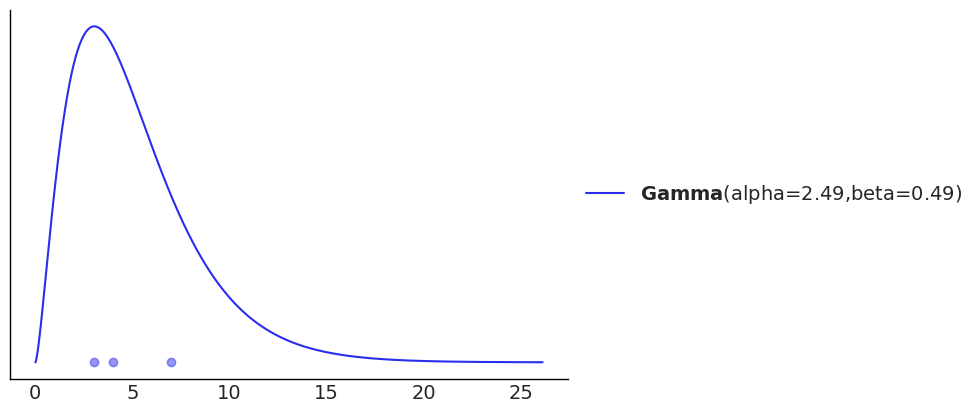

In [15]:
pz.quartile(pz.Gamma(), 3, 4, 7);

Both `pz.quartile` and `pz.maxent` will return a message when the difference between the requested and computed masses is larger than certain threshold.

(mle_interactive)=

## Maximum likelihood fit

Yet another scenario is to have some data that we want to use as a prior. One way to do it is to fit the data to some parametric family of distributions. We can then use a maximum likelihood estimate to get the distributions with the better fit.

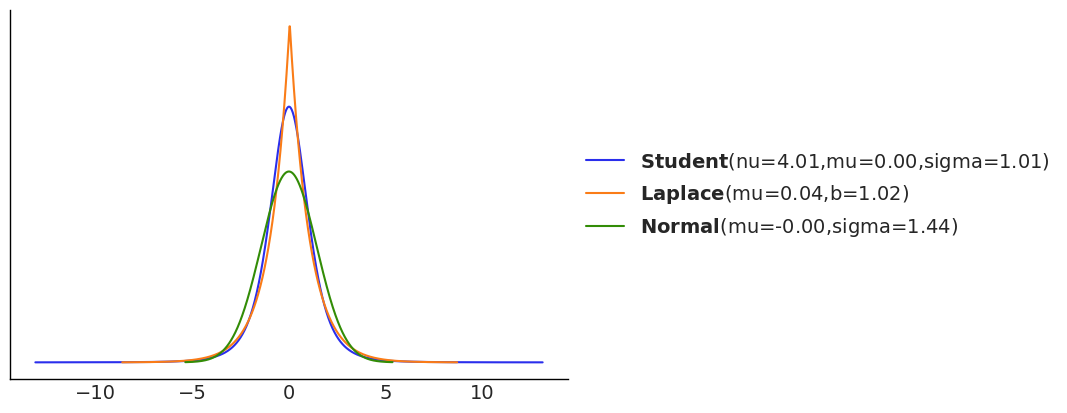

In [16]:
sample = pz.Student(4, 0, 1).rvs(
    1000
)  # in a real scenario this will be some data and not a sample from a Preliz distribution
dist0 = pz.Student()
dist1 = pz.Normal()
dist2 = pz.Laplace()
pz.mle([dist0, dist1, dist2], sample, plot=3);  # we ask to plot all 3 distribution

As expected the best match is provided by the Student-t distribution and the worst by the normal. By default `pz.mle` only plot the best match, but here we decided to get a plot of the 3 of them. Notice that distribution are updated in place so we can get access to them.

In [17]:
dist0

Student(nu=4.01,mu=0.00,sigma=1.01)

(roulette_interactive)=

## The roulette method

The roulette method allows to find prior distributions by *drawing*. For this task we are offered with a grid of m equally sized bins covering the range of x. And we have to allocate a total of n chips between the bins. In other words we use a grid to draw a histogram and the function will try to tell us what distribution, from a given pool of options, is a better fit for our drawing.

The `pz.roulette()` function uses matplotlib interactively, for this to work we need to we need call the magic `%matplotlib widget` and have ipywidgets installed (a requirement of PreliZ).

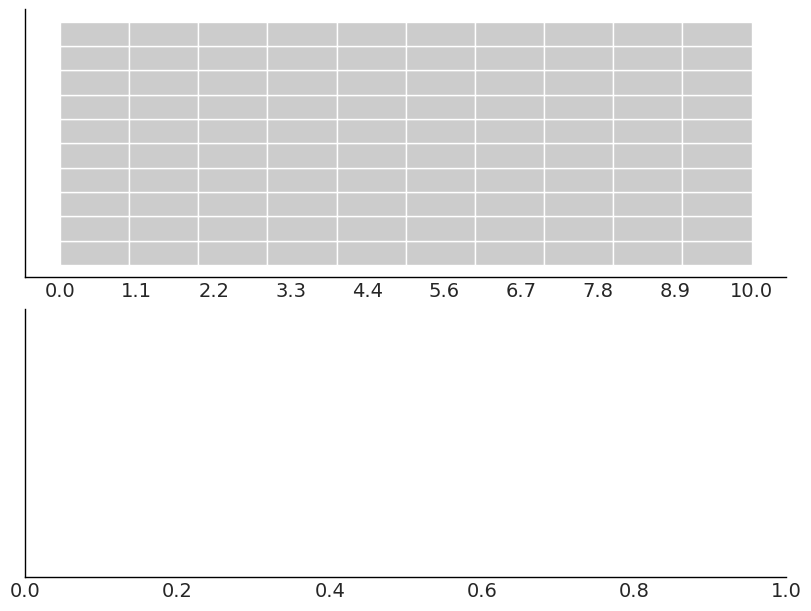

In [18]:
%matplotlib widget
pz.roulette()

If you are unable to run the previous cell, you can get a glimpse of `roulette` from this gif

![roulette](roulette.gif)

## Predictive elicitation

Predictive elicitation refers to the elicitation of priors by evaluations on the observed space. Currently PreliZ provides one experimental tool to do this, called "prior predictive assistance" (ppa for short). Most of the future development of PreliZ will be focused on improving this tool and providing other tools for predictive elicitation.

Suppose we have a very simple model here expressed using PyMC syntax:

```python
with pm.Model() as model:
    a = pm.Normal("a", 0, 10)
    b = pm.HalfNormal("b", 10)
    y = pm.Normal("y", a, b, observed=data)
    pp_samples = pm.sample_prior_predictive(500)
```

`pp_samples` contains samples from the prior and prior predictive distributions. The `ppa` function takes those samples and the PyMC `model` and return a 3x3 panel of predictive distributions that the user can select by clicking on them. The user is expected to select those distributions that best match their domain knowledge (i.e. prior information and NOT the observed data they want to fit). Once the user has selected at least one distribution is has two options click on the `carry on` button to get a new subset of predictive distributions or click on the `return prior` button to get a prior that agrees with all the selected predictive distributions. Currently `ppa` is restricted to return prior on the same family as specified in the `model`, in this example the prior for `a` will always be `Normal` and the prior for b `HalfNormal`. We are currently exploring the possibility to return families different from those specified in the original model.


![ppa](ppa.gif)